<h1>Sales by Genres Data Analysis</h1>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

games_df = pd.read_csv('../data/normalized_games_data.csv')

In [80]:
games_df.head(10)

,rank,game,platform,publisher,developer,vgchartz_score,total_shipped,total_sales,north_america_sales,pal_sales,japan_sales,other_sales,release_date,genre,metacritic_count,metacritic_score,metacritic_user_count,metacritic_user_score,esrb_rating,esrb_rating_full
0,1,Minecraft,All,Mojang,Mojang AB,NaN,238.00,NaN,NaN,NaN,NaN,NaN,2011-11-18,Misc,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Grand Theft Auto V,All,Rockstar Games,Rockstar North,NaN,180.00,NaN,NaN,NaN,NaN,NaN,2013-09-17,Action,50.0,97.0,3994.0,82.0,M,Mature
2,3,Wii Sports,Wii,Nintendo,Nintendo EAD,NaN,82.90,NaN,NaN,NaN,NaN,NaN,2006-11-19,Sports,51.0,76.0,322.0,80.0,E,Everyone
3,4,PlayerUnknown's Battlegrounds,All,PUBG Corporation,PUBG Corporation,NaN,70.00,NaN,NaN,NaN,NaN,NaN,2017-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,NaN,53.79,NaN,NaN,NaN,NaN,NaN,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Red Dead Redemption 2,All,Rockstar Games,Rockstar Studios,NaN,53.00,NaN,NaN,NaN,NaN,NaN,2018-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,The Witcher 3: Wild Hunt,All,Warner Bros. Interactive Entertainment,CD Projekt Red Studio,NaN,50.00,NaN,NaN,NaN,NaN,NaN,2015-05-18,Role-Playing,79.0,92.0,10179.0,92.0,M,Mature
7,8,Terraria,All,Re-Logic,Re-Logic,NaN,44.50,NaN,NaN,NaN,NaN,NaN,2011-05-16,Action,39.0,81.0,139.0,72.0,T,Teen
8,9,Animal Crossing: New Horizons,NS,Nintendo,Nintendo,8.0,42.21,NaN,NaN,NaN,NaN,NaN,2020-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Super Mario Bros.,NES,Nintendo,Nintendo EAD,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985-10-18,Platform,NaN,NaN,NaN,NaN,NaN,NaN


<h2>1. What is the distribution of the number of sales and a video game's genre?</h2>

The number of games we are analyzing for this question: 9611


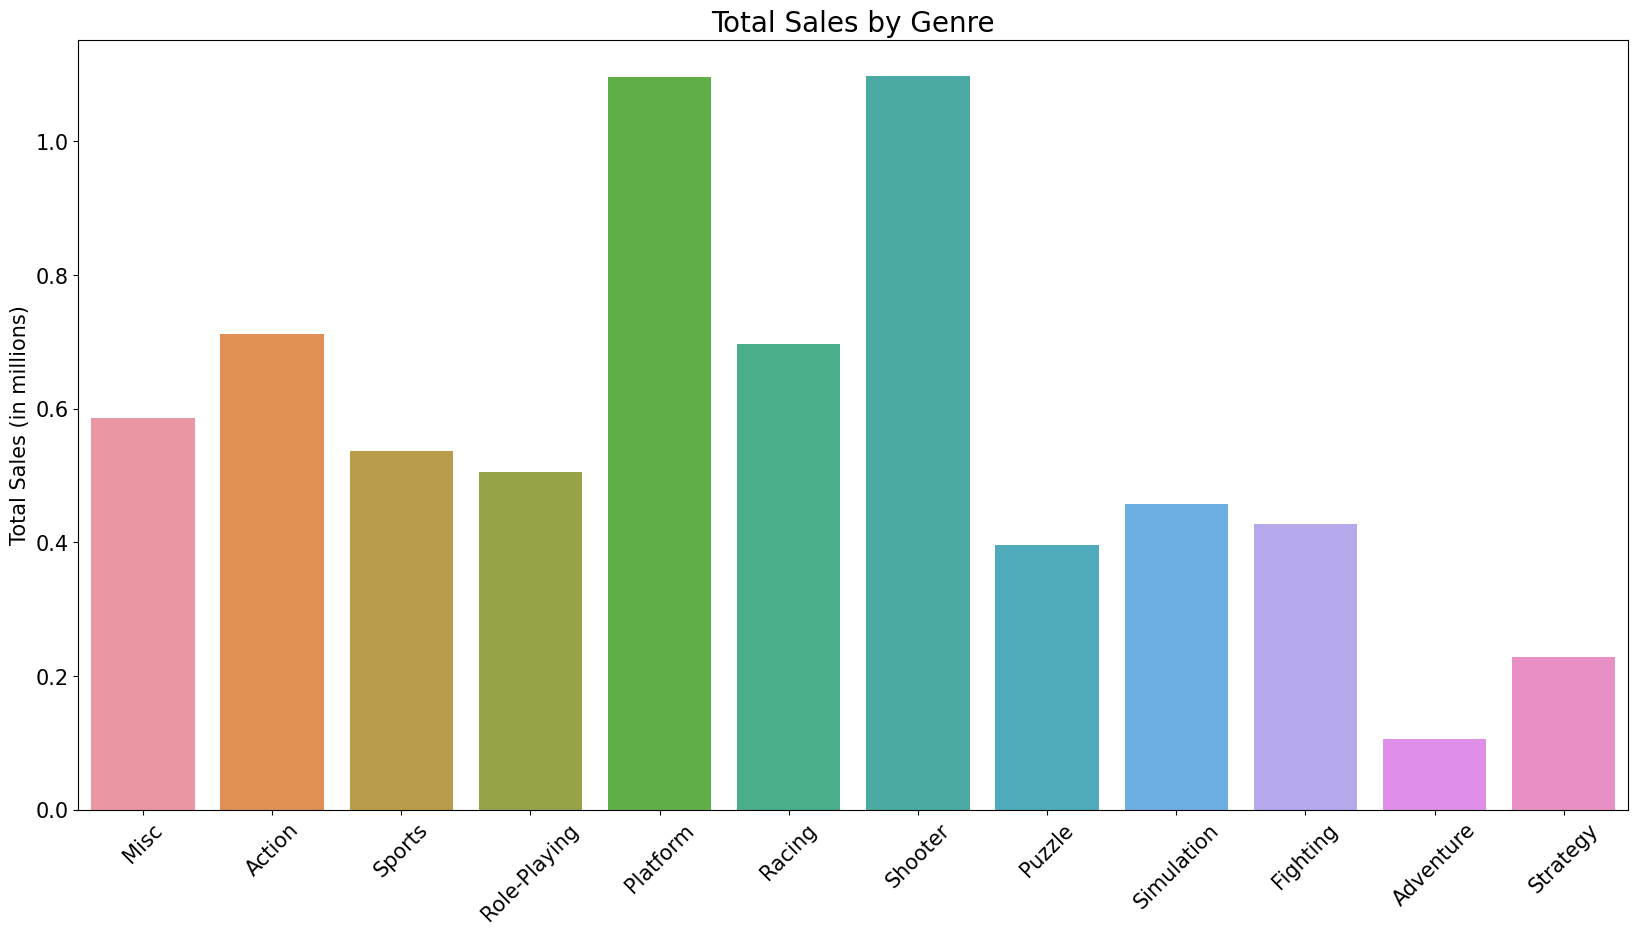

In [81]:
sales_genre_df = games_df[['genre', 'total_shipped']]

# Drop rows with NaN values
sales_genre_df = sales_genre_df.dropna()

game_sales = np.array(sales_genre_df['total_shipped'].astype(int))
game_genres = np.array(sales_genre_df['genre'])

print(f'The number of games we are analyzing for this question: {len(game_sales)}')

# Barchart
plt.figure(figsize=(20, 10))
plt.title('Total Sales by Genre', size=20)
plt.ylabel('Total Sales (in millions)', size=15)
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)
sns.barplot(x=game_genres, y=game_sales, errorbar=None)
plt.show()


<h4>Shooters and Platformers are the most popular genres of video games. Action and Racing are the next tier of popular genres.</h4>

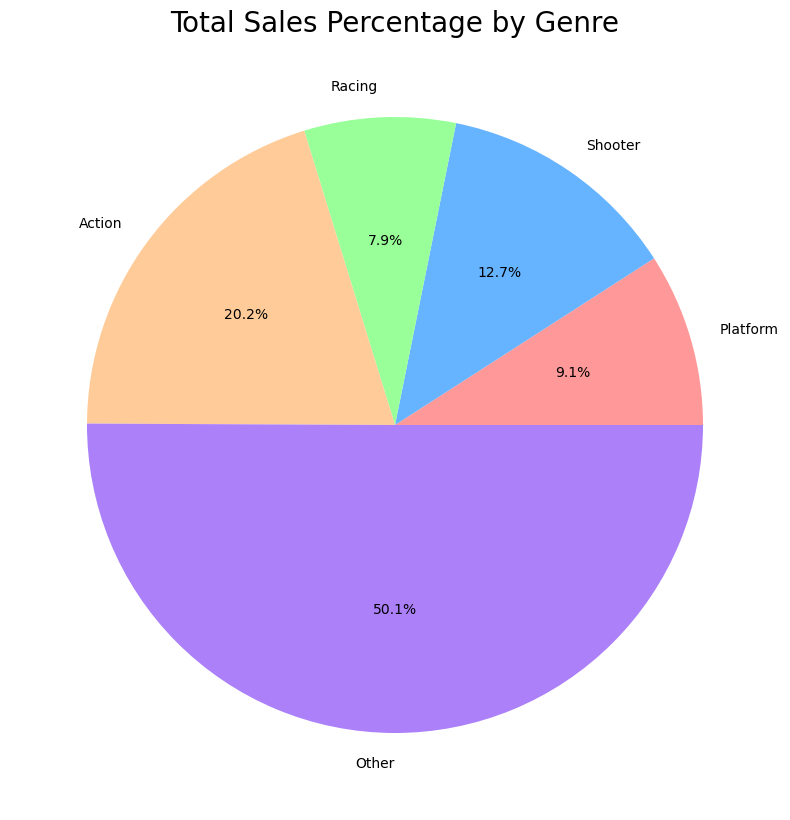

In [82]:
platform_sales_df = sales_genre_df[sales_genre_df['genre'] == 'Platform']['total_shipped']
shooter_sales_df = sales_genre_df[sales_genre_df['genre'] == 'Shooter']['total_shipped']
racing_sales_df = sales_genre_df[sales_genre_df['genre'] == 'Racing']['total_shipped']
action_sales_df = sales_genre_df[sales_genre_df['genre'] == 'Action']['total_shipped']

other_sales_df = sales_genre_df[
    (sales_genre_df['genre'] != 'Platform')
    & (sales_genre_df['genre'] != 'Shooter')
    & (sales_genre_df['genre'] != 'Racing')
    & (sales_genre_df['genre'] != 'Action')
]['total_shipped']

platform_sales = platform_sales_df.sum()
shooter_sales = shooter_sales_df.sum()
racing_sales = racing_sales_df.sum()
action_sales = action_sales_df.sum()

other_sales = other_sales_df.sum()

# Create a pie chart
plt.figure(figsize=(20, 10))
plt.title('Total Sales Percentage by Genre', size=20)
plt.pie(
    [platform_sales, shooter_sales, racing_sales, action_sales, other_sales],
    labels=['Platform', 'Shooter', 'Racing', 'Action', 'Other'],
    autopct='%1.1f%%',
    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#AB80F9'],
)
plt.show()

<h4>4 genres (Shooter, Platformer, Action, and Racing) account for 50% of all video game sales. There are 12 different genres in this dataset.</h4>

<h2>2. What is the distribution of the top 100 games' genres?</h2>

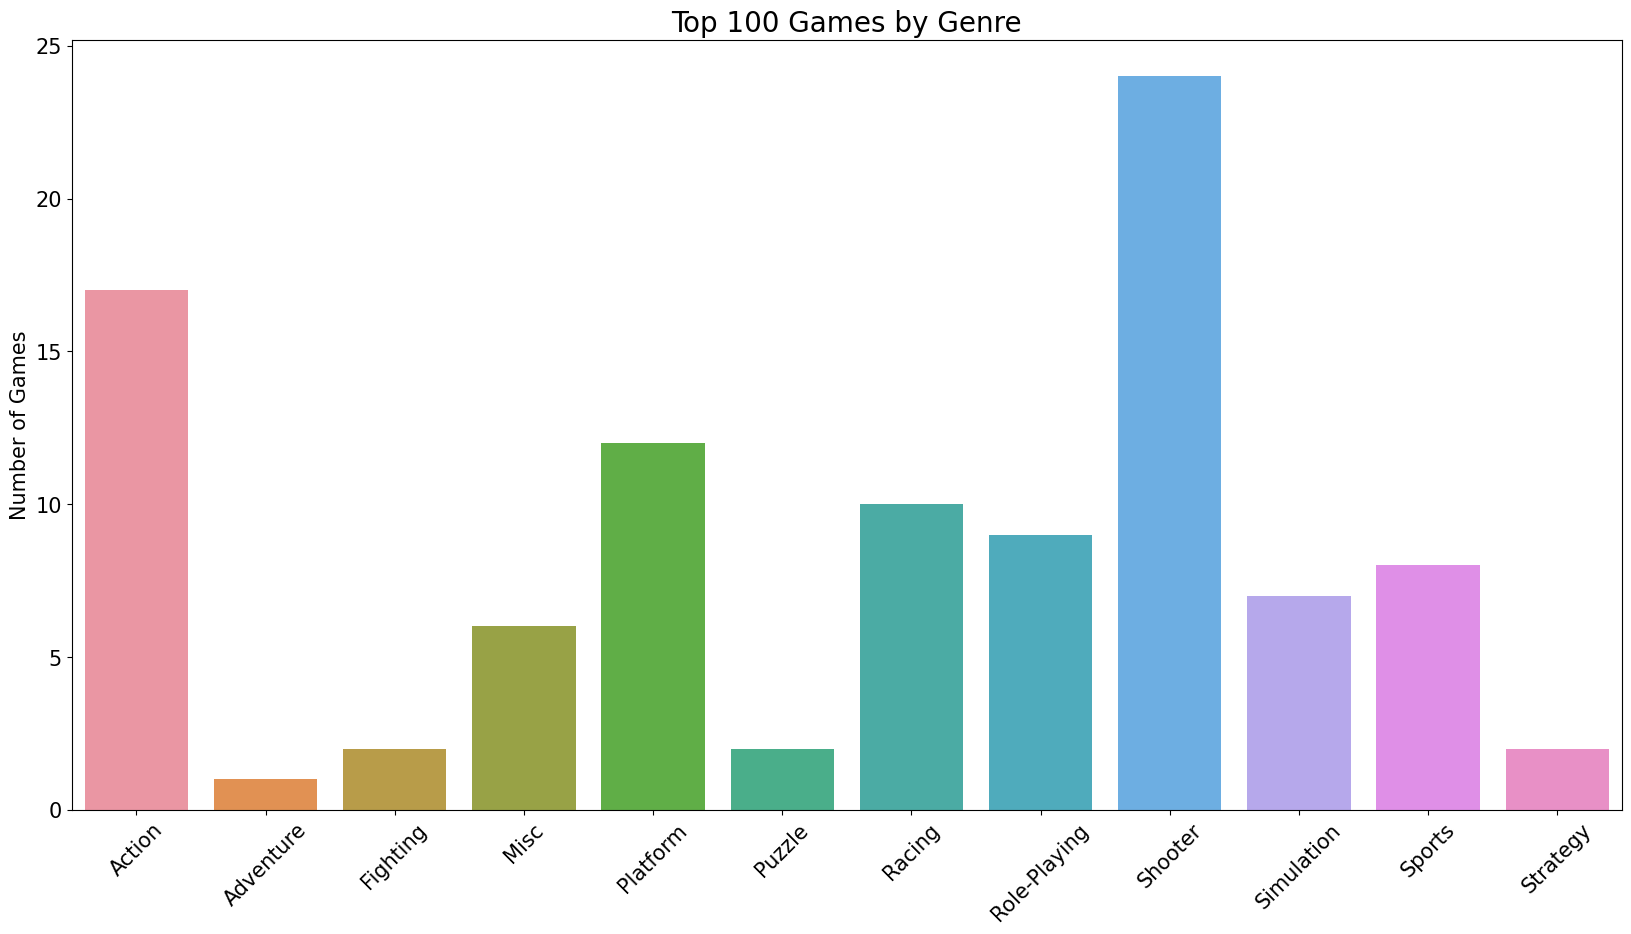

In [122]:
top_100_games_df = sales_genre_df.sort_values(by='total_shipped', ascending=False).head(100)
top_100_games_genre_count_df = top_100_games_df.groupby('genre').count().reset_index()
top_100_games_genre_count_df = top_100_games_genre_count_df.rename(columns={'total_shipped': 'count'})

# top_100_games_genre_count_df.head(10)

# Plot the top 100 games by genre
plt.figure(figsize=(20, 10))
plt.title('Top 100 Games by Genre', size=20)
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)

ax = sns.barplot(x=top_100_games_genre_count_df['genre'], y=top_100_games_genre_count_df['count'], errorbar=None)
ax.set_xlabel('')
ax.set_ylabel('Number of Games', size=15)

plt.show()

Now let's use the 5 genre grouping from the previous question to see how the top 100 games are distributed.

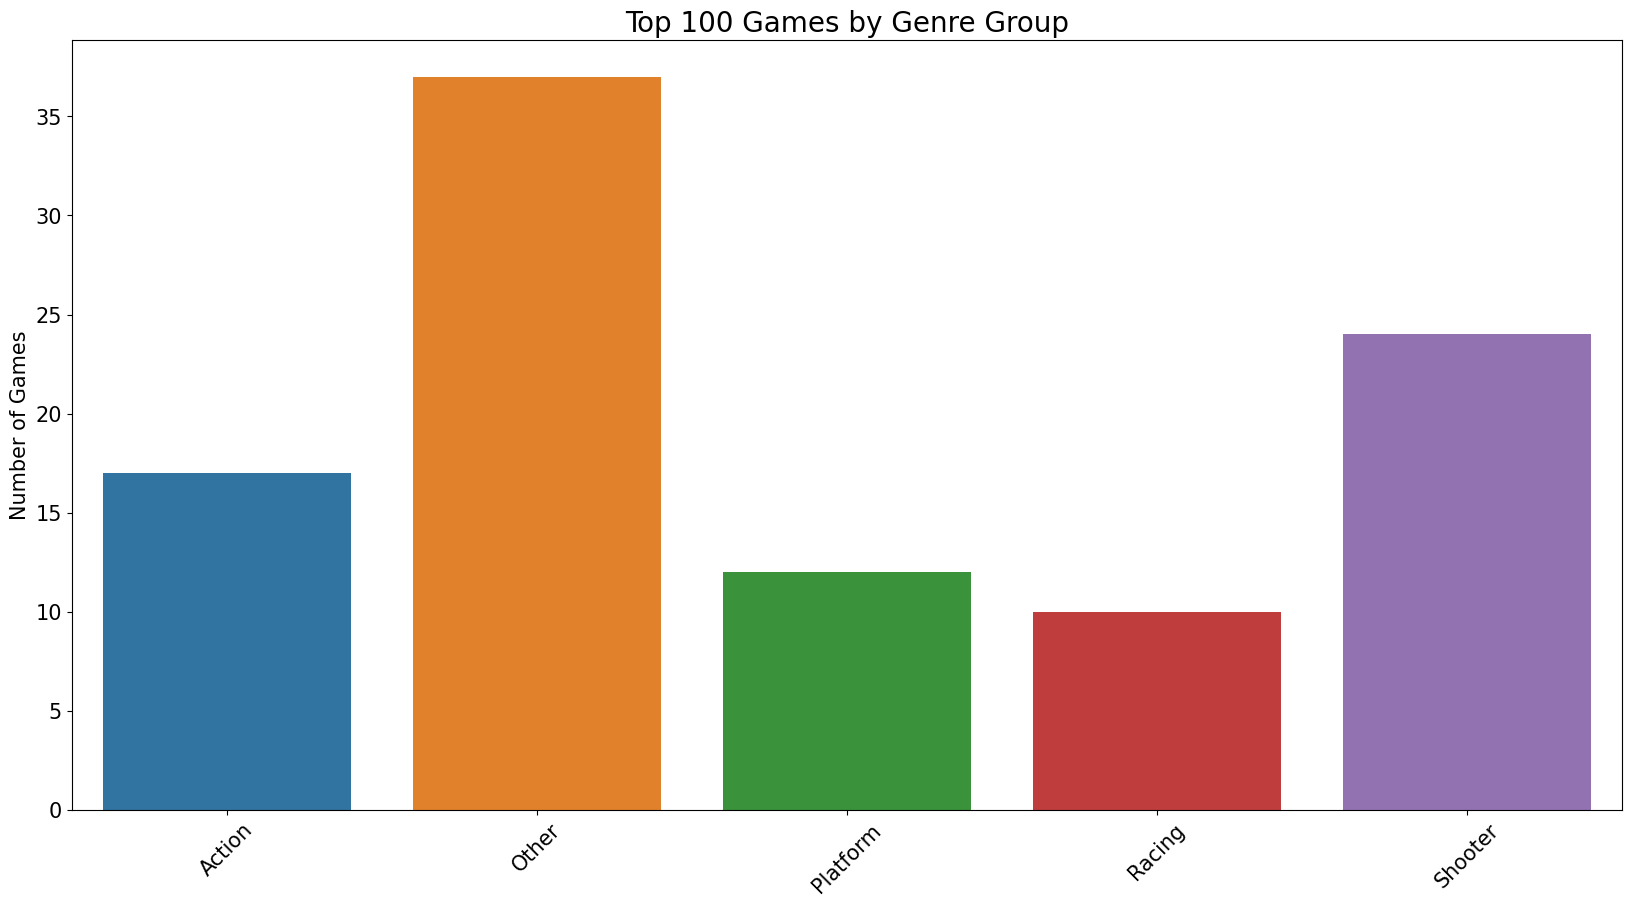

In [125]:
# Now let's use the 5 genre grouping from the previous question to see how the top 100 games are distributed.
top_100_games_genre_count_df['genre_group'] = top_100_games_genre_count_df['genre'].apply(
    lambda x: 'Platform' if x == 'Platform' else 'Shooter' if x == 'Shooter' else 'Racing' if x == 'Racing' else 'Action' if x == 'Action' else 'Other'
)

top_100_games_genre_group_count_df = top_100_games_genre_count_df.groupby('genre_group').sum(numeric_only=True).reset_index()

# top_100_games_genre_group_count_df.head(10)

# Plot the top 100 games by genre group
plt.figure(figsize=(20, 10))
plt.title('Top 100 Games by Genre Group', size=20)
plt.ylabel('Number of Games', size=15)
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)

ax = sns.barplot(x=top_100_games_genre_group_count_df['genre_group'], y=top_100_games_genre_group_count_df['count'], errorbar=None)
ax.set_xlabel('')
ax.set_ylabel('Number of Games', size=15)

plt.show()